In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt

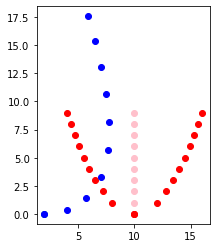

In [41]:

from utils.point import Point

robot = (2,0)
robot_point = Point(robot[0],robot[1])
fv = 2
mu = 10
sigma = 2

t = 10

mus = [mu for _ in range(t)]
sigmas = [(i * sigma**2)**0.5 for i in range(t)]
arrivals = [robot_point.shifted(distance=fv*i,
                                bearing=robot_point.direction_with(Point(mu-sig,i))) for i,sig in zip(range(t), sigmas)]
arrivals_x = [p.x for p in arrivals]
arrivals_y = [p.y for p in arrivals]

plt.scatter(mus,list(range(t)),color='pink')
plt.scatter([mu - sig for sig in sigmas],list(range(t)),color='red')
plt.scatter([mu + sig for sig in sigmas],list(range(t)),color='red')
plt.scatter(robot[0],robot[1],color='teal')
plt.scatter(arrivals_x,arrivals_y,color='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

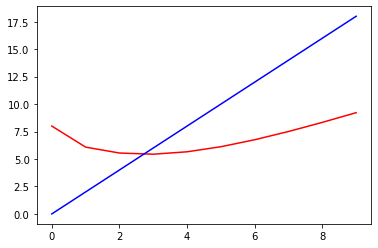

In [43]:
distances_from_robot1 = [Point(mu-sig,i).distance_to(robot_point) for i,sig in zip(range(t),sigmas)]
distances_from_robot2 = [Point(mu+sig,i).distance_to(robot_point) for i,sig in zip(range(t),sigmas)]
plt.plot(list(range(t)),distances_from_robot1,color='red')
# plt.plot(list(range(t)),distances_from_robot2,color='red')
plt.plot(list(range(t)),[fv*i for i in range(t)],color='blue')
plt.show()